In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.utils import to_categorical   #for the categorical data

In [4]:
print(keras.__version__)

3.10.0


In [5]:
#import the dataset #x: Images and Y: labels of the images
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


9


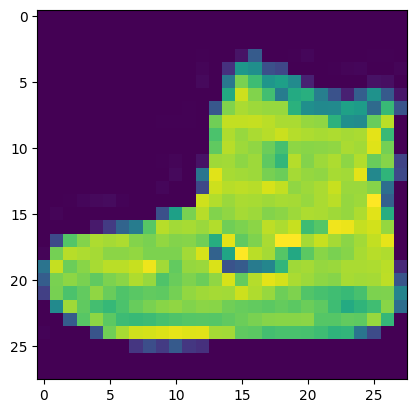

In [6]:
plt.imshow(train_X[0])
print(train_Y[0])

In [7]:
print(train_X.shape,train_Y.shape)

(60000, 28, 28) (60000,)


In [8]:
print(test_X.shape, test_Y.shape)

(10000, 28, 28) (10000,)


In [9]:
classes=np.unique(train_Y)
nClasses=len(classes)
print(classes)
print(nClasses)

[0 1 2 3 4 5 6 7 8 9]
10


In [10]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [11]:
print(train_X.shape,train_Y.shape)
print(test_X.shape, test_Y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [12]:
#Range of pixel values for each type of image
#Black-White: 0-1
#Grayscale: 0-255
#RGB: (0-255)*3

In [13]:
#converting the values of the pixels from 0-1
#type-conversion
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

In [14]:
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

In [15]:
train_Y[0]

np.uint8(9)

In [16]:
train_Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
#Model training task

In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [19]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [20]:
#Basic CNN model Develop
#Regularization and Dropout
#2nd CNN MODEL DEVELOPMENT

In [21]:
batch_size=64
epochs=20
num_classes=10

In [22]:
model=tf.keras.Sequential()

In [23]:
#1st hidden layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [24]:
#2nd hidden layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [25]:
#3rd hidden layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [26]:
model.add(tf.keras.layers.Flatten())

In [27]:
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [28]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
48000/64

750.0

In [30]:
model_train=model.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 94s 122ms/step - accuracy: 0.7583 - loss: 0.6646 - val_accuracy: 0.8725 - val_loss: 0.3385
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 91s 122ms/step - accuracy: 0.8927 - loss: 0.2942 - val_accuracy: 0.8992 - val_loss: 0.2738
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 128ms/step - accuracy: 0.9096 - loss: 0.2461 - val_accuracy: 0.9051 - val_loss: 0.2584
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 91s 121ms/step - accuracy: 0.9214 - loss: 0.2077 - val_accuracy: 0.9118 - val_loss: 0.2369
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 90s 120ms/step - accuracy: 0.9328 - loss: 0.1831 - val_accuracy: 0.9174 - val_loss: 0.2335
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.9444 - loss: 0.1503 - val_accuracy: 0.9180 - val_loss: 0.2360
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 124ms/step - accuracy: 0.9509 - loss: 0.1303 - val_accuracy: 0.9172 - val_loss: 0.2337
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 145s 129ms/step - accuracy: 0.9578 - los

In [31]:
testing_evaluation=model.evaluate(test_X,test_Y_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9106 - loss: 0.5108


In [32]:
testing_evaluation  #loss,accuracy

[0.5118171572685242, 0.911300003528595]

In [33]:
model_train.history

{'accuracy': [0.8325416445732117,
  0.8943750262260437,
  0.9108750224113464,
  0.9233750104904175,
  0.9329166412353516,
  0.942270815372467,
  0.9498541951179504,
  0.9551249742507935,
  0.9634374976158142,
  0.9680208563804626,
  0.973437488079071,
  0.9768333435058594,
  0.9792916774749756,
  0.9824166893959045,
  0.9839166402816772,
  0.9855625033378601,
  0.9863541722297668,
  0.9893749952316284,
  0.9882083535194397,
  0.9895208477973938],
 'loss': [0.4616490602493286,
  0.2885780930519104,
  0.24186336994171143,
  0.20754830539226532,
  0.18125775456428528,
  0.15674105286598206,
  0.13548055291175842,
  0.11855795234441757,
  0.09869328141212463,
  0.0844607874751091,
  0.06971167773008347,
  0.06120765209197998,
  0.054045625030994415,
  0.04752148315310478,
  0.04171367734670639,
  0.03727490082383156,
  0.03700052201747894,
  0.02943240851163864,
  0.032244324684143066,
  0.0288013257086277],
 'val_accuracy': [0.8725000023841858,
  0.8991666436195374,
  0.9050833582878113,


In [34]:
accuracy=model_train.history['accuracy']
val_accuracy=model_train.history['val_accuracy']
loss=model_train.history['loss']
val_loss=model_train.history['val_loss']
epochs=range(len(accuracy))

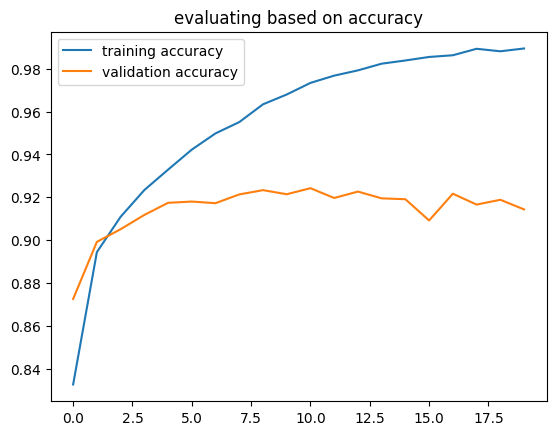

In [35]:
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('evaluating based on accuracy')
plt.legend()
plt.show()

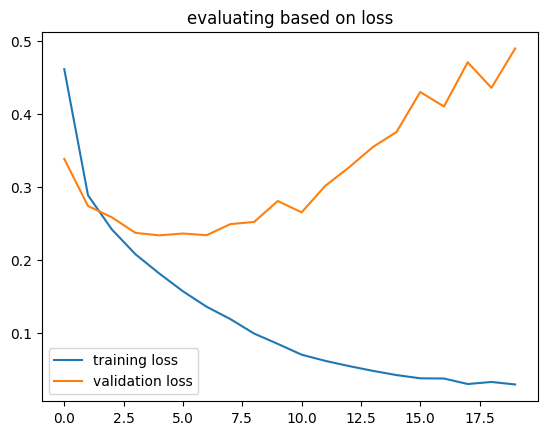

In [36]:
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.title('evaluating based on loss')
plt.legend()
plt.show()

Regularization

In [37]:
regmodel=tf.keras.Sequential()
#1st hidden layer
regmodel.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#2nd hidden layer
regmodel.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#3rd hidden layer
regmodel.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.40))
regmodel.add(tf.keras.layers.Flatten())
regmodel.add(tf.keras.layers.Dense(128,activation='linear'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.Dropout(0.3))
regmodel.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [38]:
regmodel.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [39]:
reg_model_train=regmodel.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 108s 140ms/step - accuracy: 0.6816 - loss: 0.8545 - val_accuracy: 0.8683 - val_loss: 0.3546
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 131ms/step - accuracy: 0.8603 - loss: 0.3875 - val_accuracy: 0.8881 - val_loss: 0.3004
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 100s 134ms/step - accuracy: 0.8801 - loss: 0.3243 - val_accuracy: 0.8992 - val_loss: 0.2735
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 130ms/step - accuracy: 0.8900 - loss: 0.2933 - val_accuracy: 0.9056 - val_loss: 0.2568
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 135ms/step - accuracy: 0.8997 - loss: 0.2715 - val_accuracy: 0.9081 - val_loss: 0.2485
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 97s 129ms/step - accuracy: 0.9018 - loss: 0.2637 - val_accuracy: 0.9160 - val_loss: 0.2303
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 145s 133ms/step - accuracy: 0.9076 - loss: 0.2518 - val_accuracy: 0.9167 - val_loss: 0.2268
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 97s 129ms/step - accuracy: 0.9104 - l